#**Lógica difusa para controlar el trimado de una vela**

##**Descripción del Sistema Difuso**

Librerías necesarias de Python.

In [ ]:
# Instalación librería
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

Creación de los antecedentes y el consecuente.

*   Antecedentes: Rumbo de navegación, Fuerza del viento
*   Consecuente: Trimado de la vela

In [ ]:
# New Antecedent/Consequent objects hold universe variables and membership functions
wind_force = ctrl.Antecedent(np.arange(0, 62, 1), 'Wind Force')
course = ctrl.Antecedent(np.arange(0, 185, 1), 'Navigation Course')
trim_sail = ctrl.Consequent(np.arange(0, 100, 1), 'Trimming Sail', defuzzify_method="mom")

# Wind Force (km/h)
wind_force['Light'] = fuzz.trimf(wind_force.universe, [0, 0, 20])
wind_force['Moderate'] = fuzz.trimf(wind_force.universe, [10, 20, 40])
wind_force['Strong'] = fuzz.trapmf(wind_force.universe, [20, 40, 62, 62])

# Navigation Course (º)
course['HeadtoWind'] = fuzz.trimf(course.universe, [0, 0, 40])
course['CloseHauled'] = fuzz.trimf(course.universe, [25, 50, 75])
course['Reaching'] = fuzz.trimf(course.universe, [60, 105, 150]) 
course['Running'] = fuzz.trimf(course.universe, [140, 160, 181])

# Trimming of the Sail
trim_sail.automf(names = ['TooLoose','Loose','Tighten','TooTighten'])

Visualización de los antecedentes y consecuente.

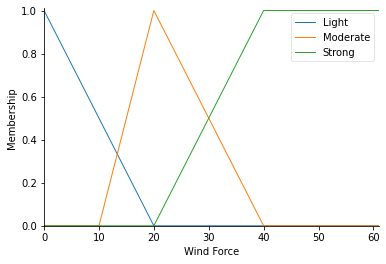

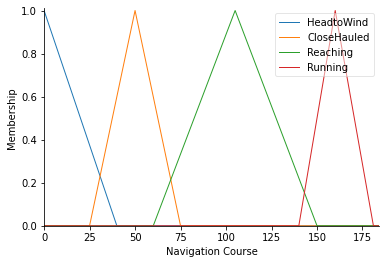

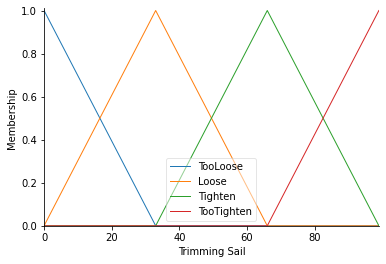

In [ ]:
# Antecedents
wind_force.view()
course.view()
# Consequent
trim_sail.view()

##**Reglas Difusas**

Para un rumbo de Ceñida:
*   Viento Ligero: Largada
*   Viento Moderado o Fuerte: Cazada al máximo

Para una navegación de Través y Largo:
*   Viento Ligero o Fuerte: Largada
*   Viento Moderado: Largada al máximo

Para una navegación en Popa Cerrada:
*   Independientemente de la fuerza del Viento: Cazada


In [ ]:
rule1 = ctrl.Rule(wind_force['Light'] & (course['CloseHauled'] | course['Reaching']), trim_sail['Loose'])
rule2 = ctrl.Rule((wind_force['Moderate'] | wind_force['Strong']) & course['CloseHauled'], trim_sail['TooTighten'])

rule3 = ctrl.Rule(wind_force['Moderate'] & course['Reaching'], trim_sail['TooLoose'])
rule4 = ctrl.Rule(wind_force['Strong'] & course['Reaching'], trim_sail['Loose'])

rule5 = ctrl.Rule(course['Running'], trim_sail['Tighten'])

sailing_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
sailing = ctrl.ControlSystemSimulation(sailing_ctrl)

##**Resultados**

Ejemplo simple: 
*   Fuerza del Viento: Ligera
*   Rumbo de Navegación: Ceñida

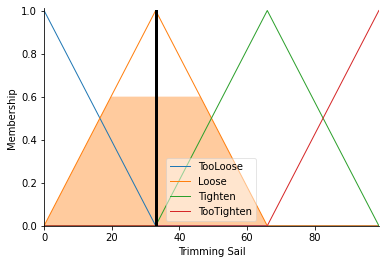

In [ ]:
sailing.input['Wind Force'] = 5
sailing.input['Navigation Course'] = 40

sailing.compute()
trim_sail.view(sim=sailing)

Para un rumbo de navegación fijo, en este caso de Través/Largo, ver la variación del trimado en función de la fuerza del viento.

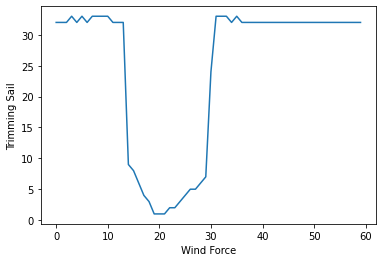

In [ ]:
s = []
sailing.input['Navigation Course'] = 110

for r in range(0, 60):
    sailing.input['Wind Force'] = r
    sailing.compute()
    s.append(int(sailing.output['Trimming Sail']))
    

plt.xlabel("Wind Force")
plt.ylabel("Trimming Sail")
plt.plot(s)

Para una fuerza moderada de viento, observación de la variación del trimado en función del rumbo de navegación.

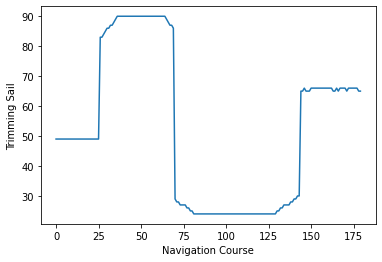

In [ ]:
s = []
sailing.input['Wind Force'] = 30

for r in range(0, 180):
    sailing.input['Navigation Course'] = r
    sailing.compute()
    s.append(int(sailing.output['Trimming Sail']))
    

plt.xlabel("Navigation Course")
plt.ylabel("Trimming Sail")
plt.plot(s)